<a href="https://colab.research.google.com/github/Shathrugna123/ML/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.64      0.64      0.64        11
           2       0.67      0.67      0.67        12

    accuracy                           0.79        38
   macro avg       0.77      0.77      0.77        38
weighted avg       0.79      0.79      0.79        38



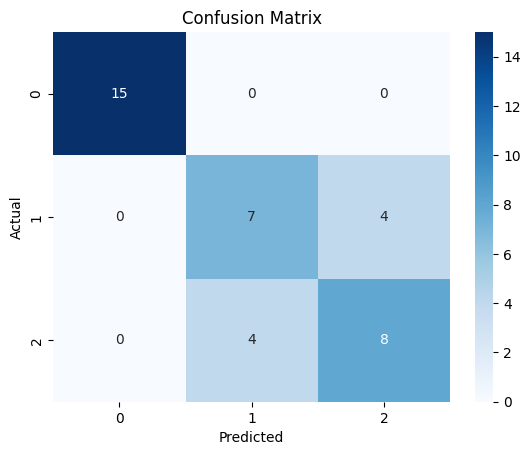

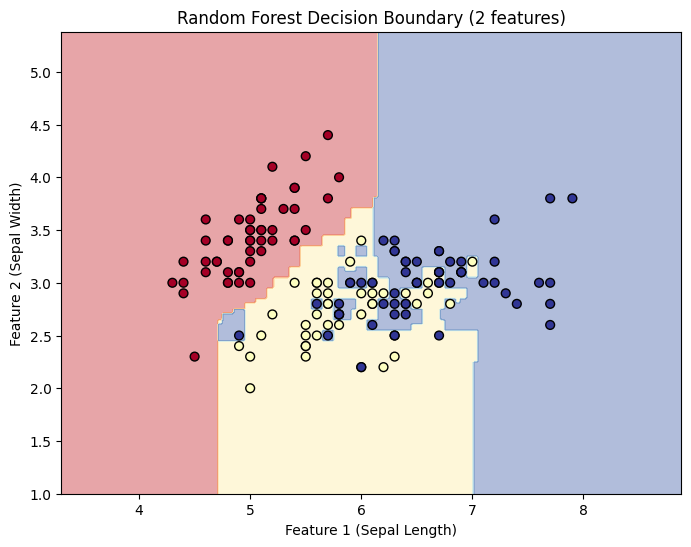

In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load Dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only 2 features for 2D plotting
y = iris.target

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Step 4: Build Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Prediction & Accuracy
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 7: Visualize Decision Boundaries
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel('Feature 1 (Sepal Length)')
    plt.ylabel('Feature 2 (Sepal Width)')
    plt.title('Random Forest Decision Boundary (2 features)')
    plt.show()

plot_decision_boundary(X, y, model)
